# Collaboration 4/18/22

In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
sys.path.insert(0, '..')


plt.rcParams['figure.figsize'] = [10, 8]
from graph import Graph
from collaboration import *

In [2]:
folder_path = "collaboration_4_12_22/"

In [3]:
n = 100
d = 10
k = 100000

# n RWs on ER

In [4]:
def f(c, a1, a2, a3):
    return a1*np.exp(-a2*c) + a3

In [6]:
coefficients = []

for i in range(2, 11):
    graph = Graph.get_er_random_graph(n, d/n)
    c = int(10/i)
    cs = np.arange(c, step=0.01)
    t = c*n
    collab_covered_avg, single_covered_avg = simulate_rw_collab_vs_single(
        graph=graph, 
        collab_num=i, 
        k=k, 
        collab_steps_per_iter=t)
    
    diff = collab_covered_avg - np.array([single_covered_avg[i*j] for j in range(c*n+1)])
    scaled_diff = np.array([diff[int(j*n)] for j in cs])
    
    popt, pcov = curve_fit(f, cs, scaled_diff)
    coefficients.append(popt)

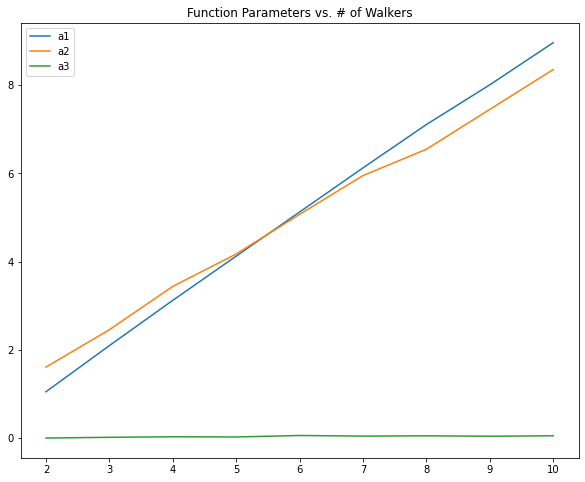

In [8]:
plt.plot(np.arange(2, 11, step=1), coefficients, label=["a1", "a2", "a3"])
plt.title("Function Parameters vs. # of Walkers")
plt.legend()
plt.show()

In [9]:
coefficients

[array([1.05010337, 1.60935241, 0.00235764]),
 array([2.0957821 , 2.45599483, 0.01878108]),
 array([3.12130483, 3.43750358, 0.03079061]),
 array([4.12239195, 4.1712676 , 0.02661044]),
 array([5.12231255, 5.06913985, 0.05994856]),
 array([6.12256923, 5.94812549, 0.04615139]),
 array([7.10438744, 6.54470164, 0.05258482]),
 array([8.00422332, 7.44827387, 0.04338966]),
 array([8.95871435, 8.35013321, 0.05320863])]

In [14]:
coefficients2 = []
c = 5
cs = np.arange(c, step=0.01)

for n in [100, 500, 1000, 5000]:
    graph = Graph.get_er_random_graph(n, d/n)
    t = c*n
    print(f"Simulating n={n}...", end="")
    collab_covered_avg, single_covered_avg = simulate_rw_collab_vs_single(
        graph=graph, 
        collab_num=2, 
        k=k, 
        collab_steps_per_iter=t)
    
    diff = collab_covered_avg - np.array([single_covered_avg[2*i] for i in range(c*n+1)])
    scaled_diff = np.array([diff[int(i*n)] for i in cs])
    
    popt, pcov = curve_fit(f, cs, scaled_diff)
    coefficients2.append(popt)
    print("done!")

Simulating n=100...done!
Simulating n=500...done!
Simulating n=1000...

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [15]:
coefficients2

[array([1.07190027, 1.65522882, 0.00176857]),
 array([1.06370472, 1.77313205, 0.01287194])]

In [ ]:
for n in [1000, 5000]:
    graph = Graph.get_er_random_graph(n, d/n)
    t = c*n
    print(f"Simulating n={n}...", end="")
    collab_covered_avg, single_covered_avg = simulate_rw_collab_vs_single(
        graph=graph, 
        collab_num=2, 
        k=k, 
        collab_steps_per_iter=t)
    
    diff = collab_covered_avg - np.array([single_covered_avg[2*i] for i in range(c*n+1)])
    scaled_diff = np.array([diff[int(i*n)] for i in cs])
    
    popt, pcov = curve_fit(f, cs, scaled_diff, p0=[1,1,0], maxfev=10000)
    coefficients2.append(popt)
    print("done!")

Simulating n=1000...done!
Simulating n=5000...